<a href="https://colab.research.google.com/github/Parthpachori/AI-group-14/blob/main/handwritting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
Please upload a handwritten document image (e.g., PNG, JPG):


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Saving a01-000u.png to a01-000u (3).png


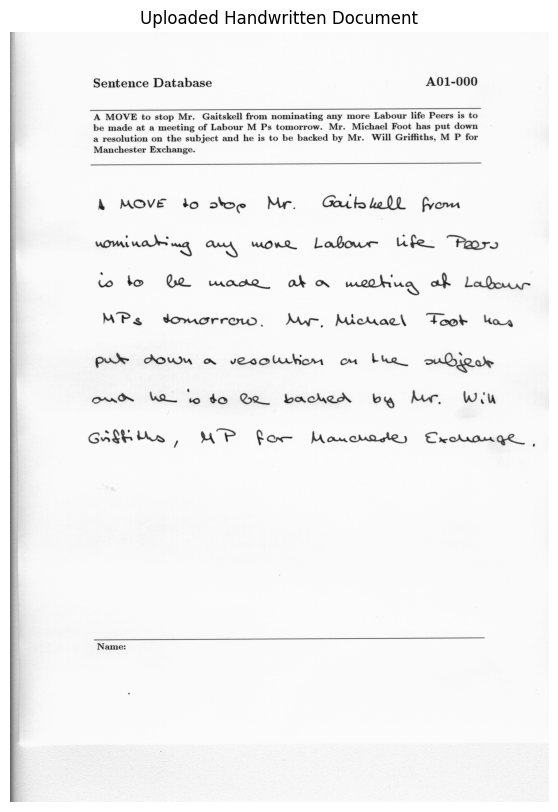


Extracted Text:
         

 

i

 
    
    
 
   

  
   
 

 

A: MOVE ‘to: stop Mr.. Gaitskell from nominating any more Labour life: Peers: is.:to
be‘made at.a-meeting of Labour M-Ps tomorrow. Mr. Michael Foot-has' put:down
a resolution on:the subject and he is to be backed by Mr. Will Griffiths; M:P*for ©
: Manchester Exchange.- ie

  

 

 

 

 

k MOVE to stoe Mr. Gaillall from

 


Extracted Sentences:
 [{'sentence': 'i\n\n \n    \n    \n \n   \n\n  \n   \n \n\n \n\nA: MOVE ‘to: stop Mr.. Gaitskell from nominating any more Labour life: Peers: is.'}, {'sentence': ':to\nbe‘made at.a-meeting of Labour M-Ps tomorrow.'}, {'sentence': "Mr. Michael Foot-has' put:down\na resolution on:the subject and he is to be backed by Mr. Will Griffiths; M:P*for ©\n: Manchester Exchange.- ie\n\n  \n\n \n\n \n\n \n\n \n\nk MOVE to stoe Mr. Gaillall from"}]

Generated JSON Output:
 {
    "document_type": "handwritten_note",
    "extracted_data": {
        "sentences": [
            {
              

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Word Accuracy Rate (WAR): 0.00
Character Error Rate (CER): 0.52

Processing complete! The extracted text has been structured and exported as JSON and CSV.


In [ ]:
# Install required libraries in Google Colab
!apt-get install -y tesseract-ocr
!pip install pytesseract opencv-python pandas nltk

# Import libraries
import cv2
import pytesseract
import pandas as pd
import json
import nltk
from google.colab import files
import matplotlib.pyplot as plt
from IPython.display import Image, display

# Download required NLTK resources
nltk.download('punkt')      # General tokenizer
nltk.download('punkt_tab')  # Updated tokenizer data for sentence splitting
from nltk.tokenize import sent_tokenize

# Upload a handwritten document image to Colab
print("Please upload a handwritten document image (e.g., PNG, JPG):")
uploaded = files.upload()

# Load the uploaded image
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path)

# Display the uploaded image
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Uploaded Handwritten Document")
plt.show()

# Step 1: Enhanced Preprocessing and Handwriting Recognition
def preprocess_image(image):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Noise reduction
    gray = cv2.GaussianBlur(gray, (5, 5), 0)
    # Adaptive thresholding for better contrast
    thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY_INV, 11, 2)
    # Dilate to connect text components
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
    thresh = cv2.dilate(thresh, kernel, iterations=1)
    return thresh

def extract_text(image):
    thresh = preprocess_image(image)
    # Use PSM 3 for auto-segmentation, suitable for mixed layouts
    text = pytesseract.image_to_string(thresh, config='--psm 3')
    return text

# Extract text from the image
extracted_text = extract_text(image)
print("\nExtracted Text:\n", extracted_text)

# Step 2: Layout Understanding (Sentence Extraction for Narrative Text)
def extract_sentences(text):
    # Split text into sentences using NLTK
    sentences = sent_tokenize(text)
    # Filter out empty or noisy sentences
    return [{"sentence": s.strip()} for s in sentences if len(s.strip()) > 10]

# Extract sentences
structured_data = extract_sentences(extracted_text)
print("\nExtracted Sentences:\n", structured_data)

# Step 3: Schema Mapping and JSON Generation
def generate_json_schema(data):
    schema = {
        "document_type": "handwritten_note",
        "extracted_data": {"sentences": data},
        "metadata": {
            "processing_date": "2025-03-26",
            "source": "uploaded_image"
        }
    }
    return schema

# Generate JSON output
json_output = generate_json_schema(structured_data)
json_string = json.dumps(json_output, indent=4)
print("\nGenerated JSON Output:\n", json_string)

# Step 4: Export to Multiple Formats
# Save as JSON file
with open('output.json', 'w') as json_file:
    json_file.write(json_string)

# Convert to CSV using pandas
df = pd.DataFrame([s["sentence"] for s in structured_data], columns=["sentence"])
df.to_csv('output.csv', index=False)

# Download the files
files.download('output.json')
files.download('output.csv')

# Step 5: Evaluation Metrics
def calculate_word_accuracy(extracted_text, ground_truth):
    extracted_words = extracted_text.lower().split()
    ground_truth_words = ground_truth.lower().split()
    correct = sum(1 for e, g in zip(extracted_words, ground_truth_words) if e == g)
    total = len(ground_truth_words)
    return correct / total if total > 0 else 0

def calculate_character_error_rate(extracted_text, ground_truth):
    # Simple Levenshtein distance implementation (no external library)
    def levenshtein_distance(s1, s2):
        if len(s1) < len(s2):
            return levenshtein_distance(s2, s1)
        if len(s2) == 0:
            return len(s1)
        previous_row = range(len(s2) + 1)
        for i, c1 in enumerate(s1):
            current_row = [i + 1]
            for j, c2 in enumerate(s2):
                insertions = previous_row[j + 1] + 1
                deletions = current_row[j] + 1
                substitutions = previous_row[j] + (c1 != c2)
                current_row.append(min(insertions, deletions, substitutions))
            previous_row = current_row
        return previous_row[-1]

    distance = levenshtein_distance(extracted_text.lower(), ground_truth.lower())
    return distance / len(ground_truth) if len(ground_truth) > 0 else 0

# Ground truth based on your document's content
ground_truth = "A MOVE to stop Mr. Gaitskell from nominating any more Labour life Peers is to be made at a meeting of Labour MPs tomorrow. Mr. Michael Foot has put down a resolution on the subject and he is to be backed by Mr. Will Griffiths, MP for Manchester Exchange."

# Calculate metrics
word_accuracy = calculate_word_accuracy(extracted_text, ground_truth)
cer = calculate_character_error_rate(extracted_text, ground_truth)
print(f"\nWord Accuracy Rate (WAR): {word_accuracy:.2f}")
print(f"Character Error Rate (CER): {cer:.2f}")

# Conclusion
print("\nProcessing complete! The extracted text has been structured and exported as JSON and CSV.")